# ESA Snow Climate Change Initiative (Snow_cci): Snow Water Equivalent (SWE) level 3C daily global climate research data package (CRDP) (1979 – 2018), version 1.0

- Data: https://catalogue.ceda.ac.uk/uuid/fa20aaa2060e40cabf5fedce7a9716d0
- Project: http://snow-cci.enveo.at/index.html

- Data path on CEDA: http://data.ceda.ac.uk/neodc/esacci/snow/data/swe/MERGED/v1.0
- FTP download: `ftp.ceda.ac.uk` (downloaded 13/10/2020)

## Abstract
Snow water equivalent (SWE) indicates the amount of accumulated snow on land surfaces; in other words the amount of water contained within the snowpack. The SWE product time series covers the period from **1979 to 2018**. Northern Hemisphere SWE products are available at daily temporal resolution with **alpine areas masked**.

The product is based on data from the Scanning Multichannel Microwave Radiometer (SMMR) operated on National Aeronautics and Space Administration’s (NASA) Nimbus-7 satellite, the Special Sensor Microwave / Imager (SSM/I) and the Special Sensor Microwave Imager / Sounder (SSMI/S) carried onboard the Defense Meteorological Satellite Program (DMSP) 5D- and F-series satellites. The satellite bands provide spatial resolutions between 15 and 69 km. The retrieval methodology combines satellite passive microwave radiometer (PMR) measurements with ground-based synoptic weather station observations by Bayesian non-linear iterative assimilation. A background snow-depth field from re-gridded surface snow-depth observations and a passive microwave emission model are required components of the retrieval scheme.

The dataset was aimed to serve the needs of users working on climate research and monitoring activities, including the detection of variability and trends, climate modelling, and aspects of hydrology and meteorology.

The Finnish Meteorological Institute is responsible for the SWE product development and generation. For the period **from 1979 to May 1987, the products are available every second day**. From October 1987 till May 2018, the products are available daily. Products are only generated for the **Northern Hemisphere winter seasons**, usually from **beginning of October till the middle of May**. A limited number of SWE products are available for days in June and September; products are **not available for the months July and August** as there is usually no snow information reported on synoptic weather stations, which is required as input for the SWE retrieval. Because of known limitations in alpine terrain, **a complex-terrain mask is applied** based on the sub-grid variability in elevation determined from a high-resolution digital elevation model. **All land ice and large lakes are also masked**; retrievals are not produced for coastal regions of Greenland.

## Data access on CICLAD
Path on CICLAD: `/data/mlalande/ESACCI/SWE/v1.0`


## Python environment
conda env: new `phd_v3` (in `envs/phd`)

# Import modules

In [2]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


In [3]:
xr.__version__

'0.16.0'

# Define paths

In [4]:
path = '/data/mlalande/ESACCI/SWE/v1.0'

# Get data
Try with only one year 2017 to test

In [5]:
ds = xr.open_mfdataset(path+'/2017/*/*.nc', combine='by_coords')
ds

,Array,Chunk
Bytes,2.41 MB,11.52 kB
Shape,"(209, 720, 2)","(1, 720, 2)"
Count,836 Tasks,209 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,4.82 MB,23.04 kB
Shape,"(209, 1440, 2)","(1, 1440, 2)"
Count,836 Tasks,209 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [45]:
swe_with_mask = ds.swe
swe_std_with_mask = ds.swe_std

In [47]:
# swe_with_mask
# swe_std_with_mask

### swe
- long_name : Snow Water Equivalent
- grid_mapping : spatial_ref
- units : mm
- valid_range : [  1 500]
- actual_range : [  1 278]
- flag_values : [-30 -20 -10  -1   0]
- flag_meanings : Glacier Mountain Water no_data no_snow
- ancillary_variables : swe_std

### swe_std
- long_name : statistical standard deviation of estimate
- grid_mapping : spatial_ref
- units : mm
- valid_range : [  1 250]
- actual_range : [ 1 83]
- flag_values : [-30 -20 -10  -1   0]
- flag_meanings : Glacier Mountain Water no_data no_snow

In [53]:
swe = swe_with_mask.where( (swe_with_mask >= 1) & (swe_with_mask <= 500) )
swe_std = swe_std_with_mask.where( (swe_std_with_mask >= 1) & (swe_std_with_mask <= 250) )
no_snow = swe_with_mask.where(swe_with_mask == 0)
no_data = swe_with_mask.where(swe_with_mask == -1)
water = swe_with_mask.where(swe_with_mask == -10)
mountain = swe_with_mask.where(swe_with_mask == -20)
glacier = swe_with_mask.where(swe_with_mask == -30)

In [54]:
time='2017-01-01'

swe_test = swe.sel(time=time, lat=slice(0,90)).load()
swe_std_test = swe_std.sel(time=time, lat=slice(0,90)).load()
no_snow_test = no_snow.sel(time=time, lat=slice(0,90)).load()
no_data_test = no_data.sel(time=time, lat=slice(0,90)).load()
water_test = water.sel(time=time, lat=slice(0,90)).load()
mountain_test = mountain.sel(time=time, lat=slice(0,90)).load()
glacier_test = glacier.sel(time=time, lat=slice(0,90)).load()

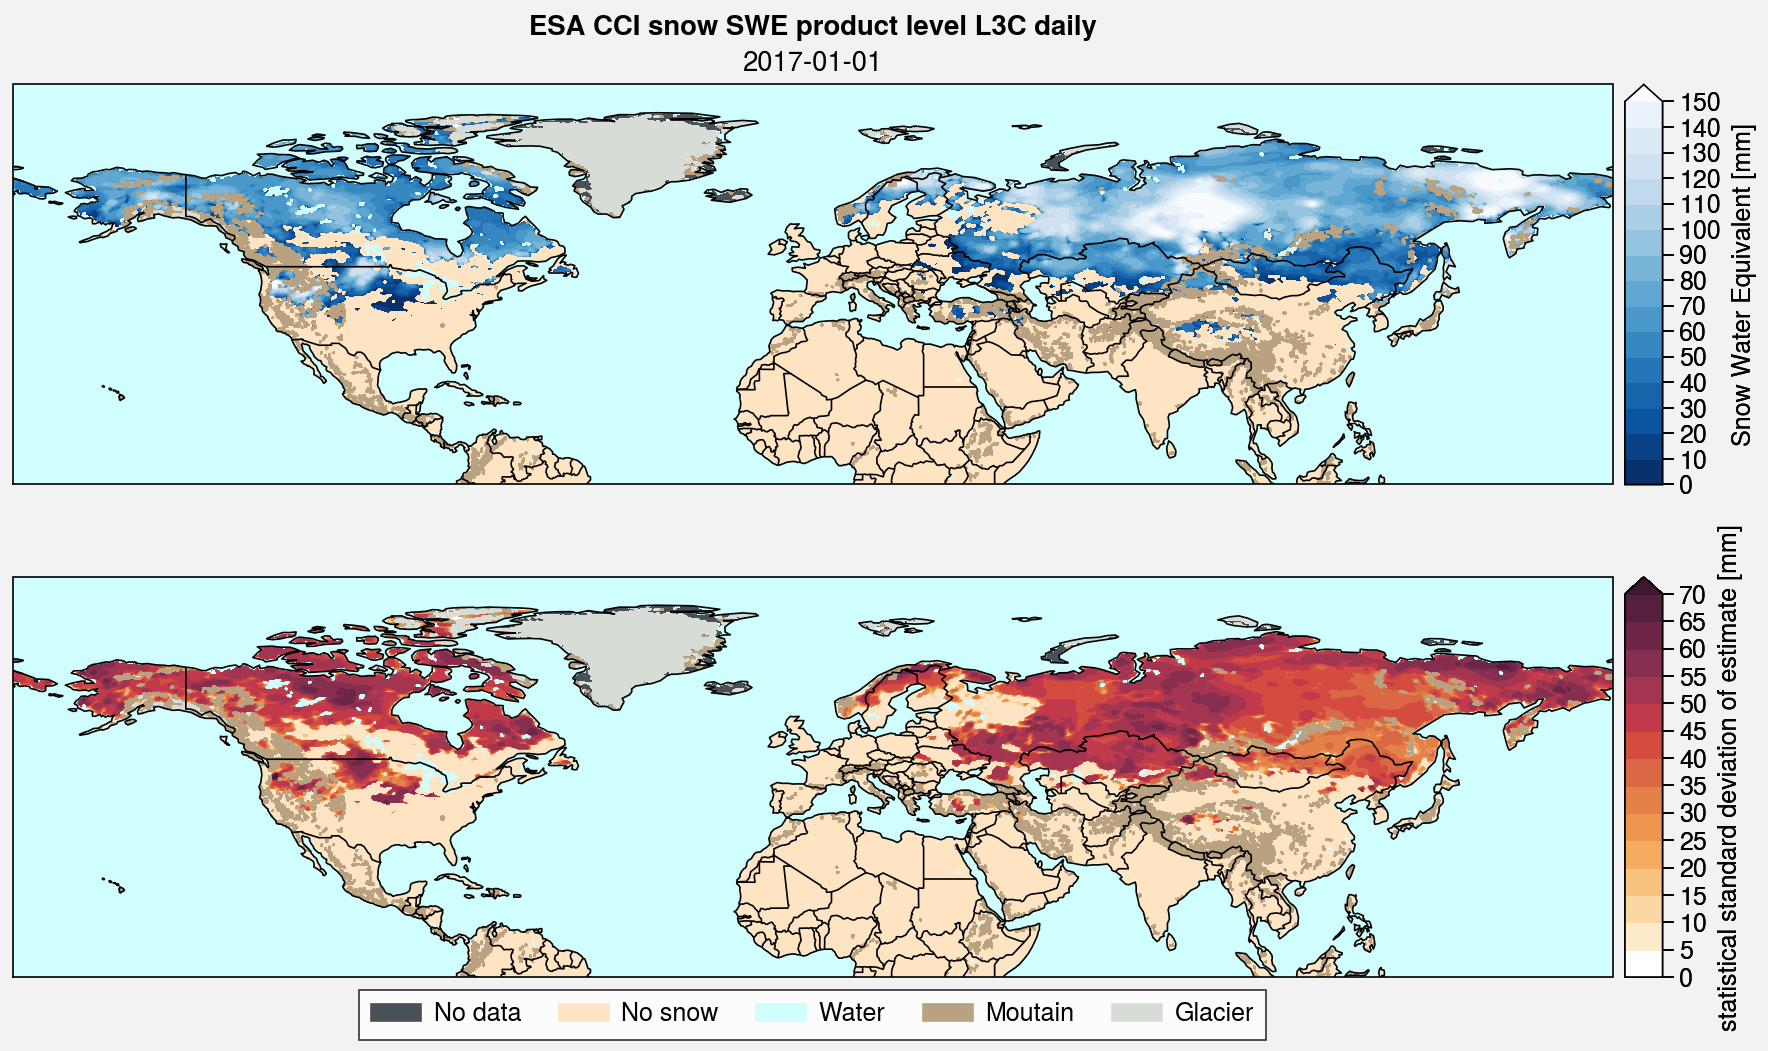

In [69]:
import matplotlib.patches as mpatches

fig, axs = plot.subplots(proj='cyl', axwidth=8, nrows=2)

cmap='Blues_r'
levels=plot.arange(0,150,10)
extend='max'

cmap_std='Fire'
levels_std=plot.arange(0,70,5)
extend_std='max'

label_no_data = 'No data'; color_no_data = 'gray7'
label_no_snow = 'No snow'; color_no_snow = 'bisque'
label_water = 'Water'; color_water = 'pale blue'
label_moutain = 'Moutain'; color_moutain = 'taupe'
label_glacier = 'Glacier'; color_glacier = 'light gray'

# SWE
m = axs[0].contourf(swe_test, cmap=cmap, levels=levels, extend=extend)
axs[0].colorbar(m, label=swe_test.long_name + ' [' + swe_test.units + ']')
axs[0].format(title=str(swe_test.time.values)[:10])

# SWE STD
m = axs[1].contourf(swe_std_test, cmap=cmap_std, levels=levels_std, extend=extend_std)
axs[1].colorbar(m, label=swe_std_test.long_name + ' [' + swe_std_test.units + ']')
# axs[1].format(title=str(swe_std_test.time.values)[:10])


for ax in axs:
    # no_snow
    ax.contourf(no_snow_test, color=color_no_snow)
    no_snow_patch = mpatches.Patch(color=color_no_snow, label=label_no_snow)

    # no_data
    ax.contourf(no_data_test, color=color_no_data)
    no_data_patch = mpatches.Patch(color=color_no_data, label=label_no_data)

    # Water
    ax.contourf(water_test, color=color_water)
    water_patch = mpatches.Patch(color=color_water, label=label_water)

    # Moutain
    ax.contourf(mountain_test, color=color_moutain)
    moutain_patch = mpatches.Patch(color=color_moutain, label=label_moutain)

    # Glacier
    ax.contourf(glacier_test, color=color_glacier)
    glacier_patch = mpatches.Patch(color=color_glacier, label=label_glacier)

axs[1].legend(
    [no_data_patch, no_snow_patch, water_patch, moutain_patch, glacier_patch], 
    loc='b', ncols=5)

axs.format(
    labels=False, grid=False, latlim=(0,90), coast=True, borders=True,
    ocean=True, oceancolor=color_water,
    suptitle=ds.title
)

# Make monthly mean

In [72]:
!ls /data/mlalande/ESACCI/SWE/v1.0/2017

01  02	03  04	05  06	10  11	12


In [75]:
swe = swe_with_mask.where(swe_with_mask >= 0).sel(lat=slice(0,90))
monthly_swe = swe.groupby('time.month').mean('time', skipna=False)

'March'

In [77]:
monthly_swe.sel(month=1)

<xarray.DataArray 'swe' (lat: 360, lon: 1440)>
dask.array<getitem, shape=(360, 1440), dtype=float64, chunksize=(360, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 0.125 0.375 0.625 0.875 ... 89.12 89.38 89.62 89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    month    int64 1

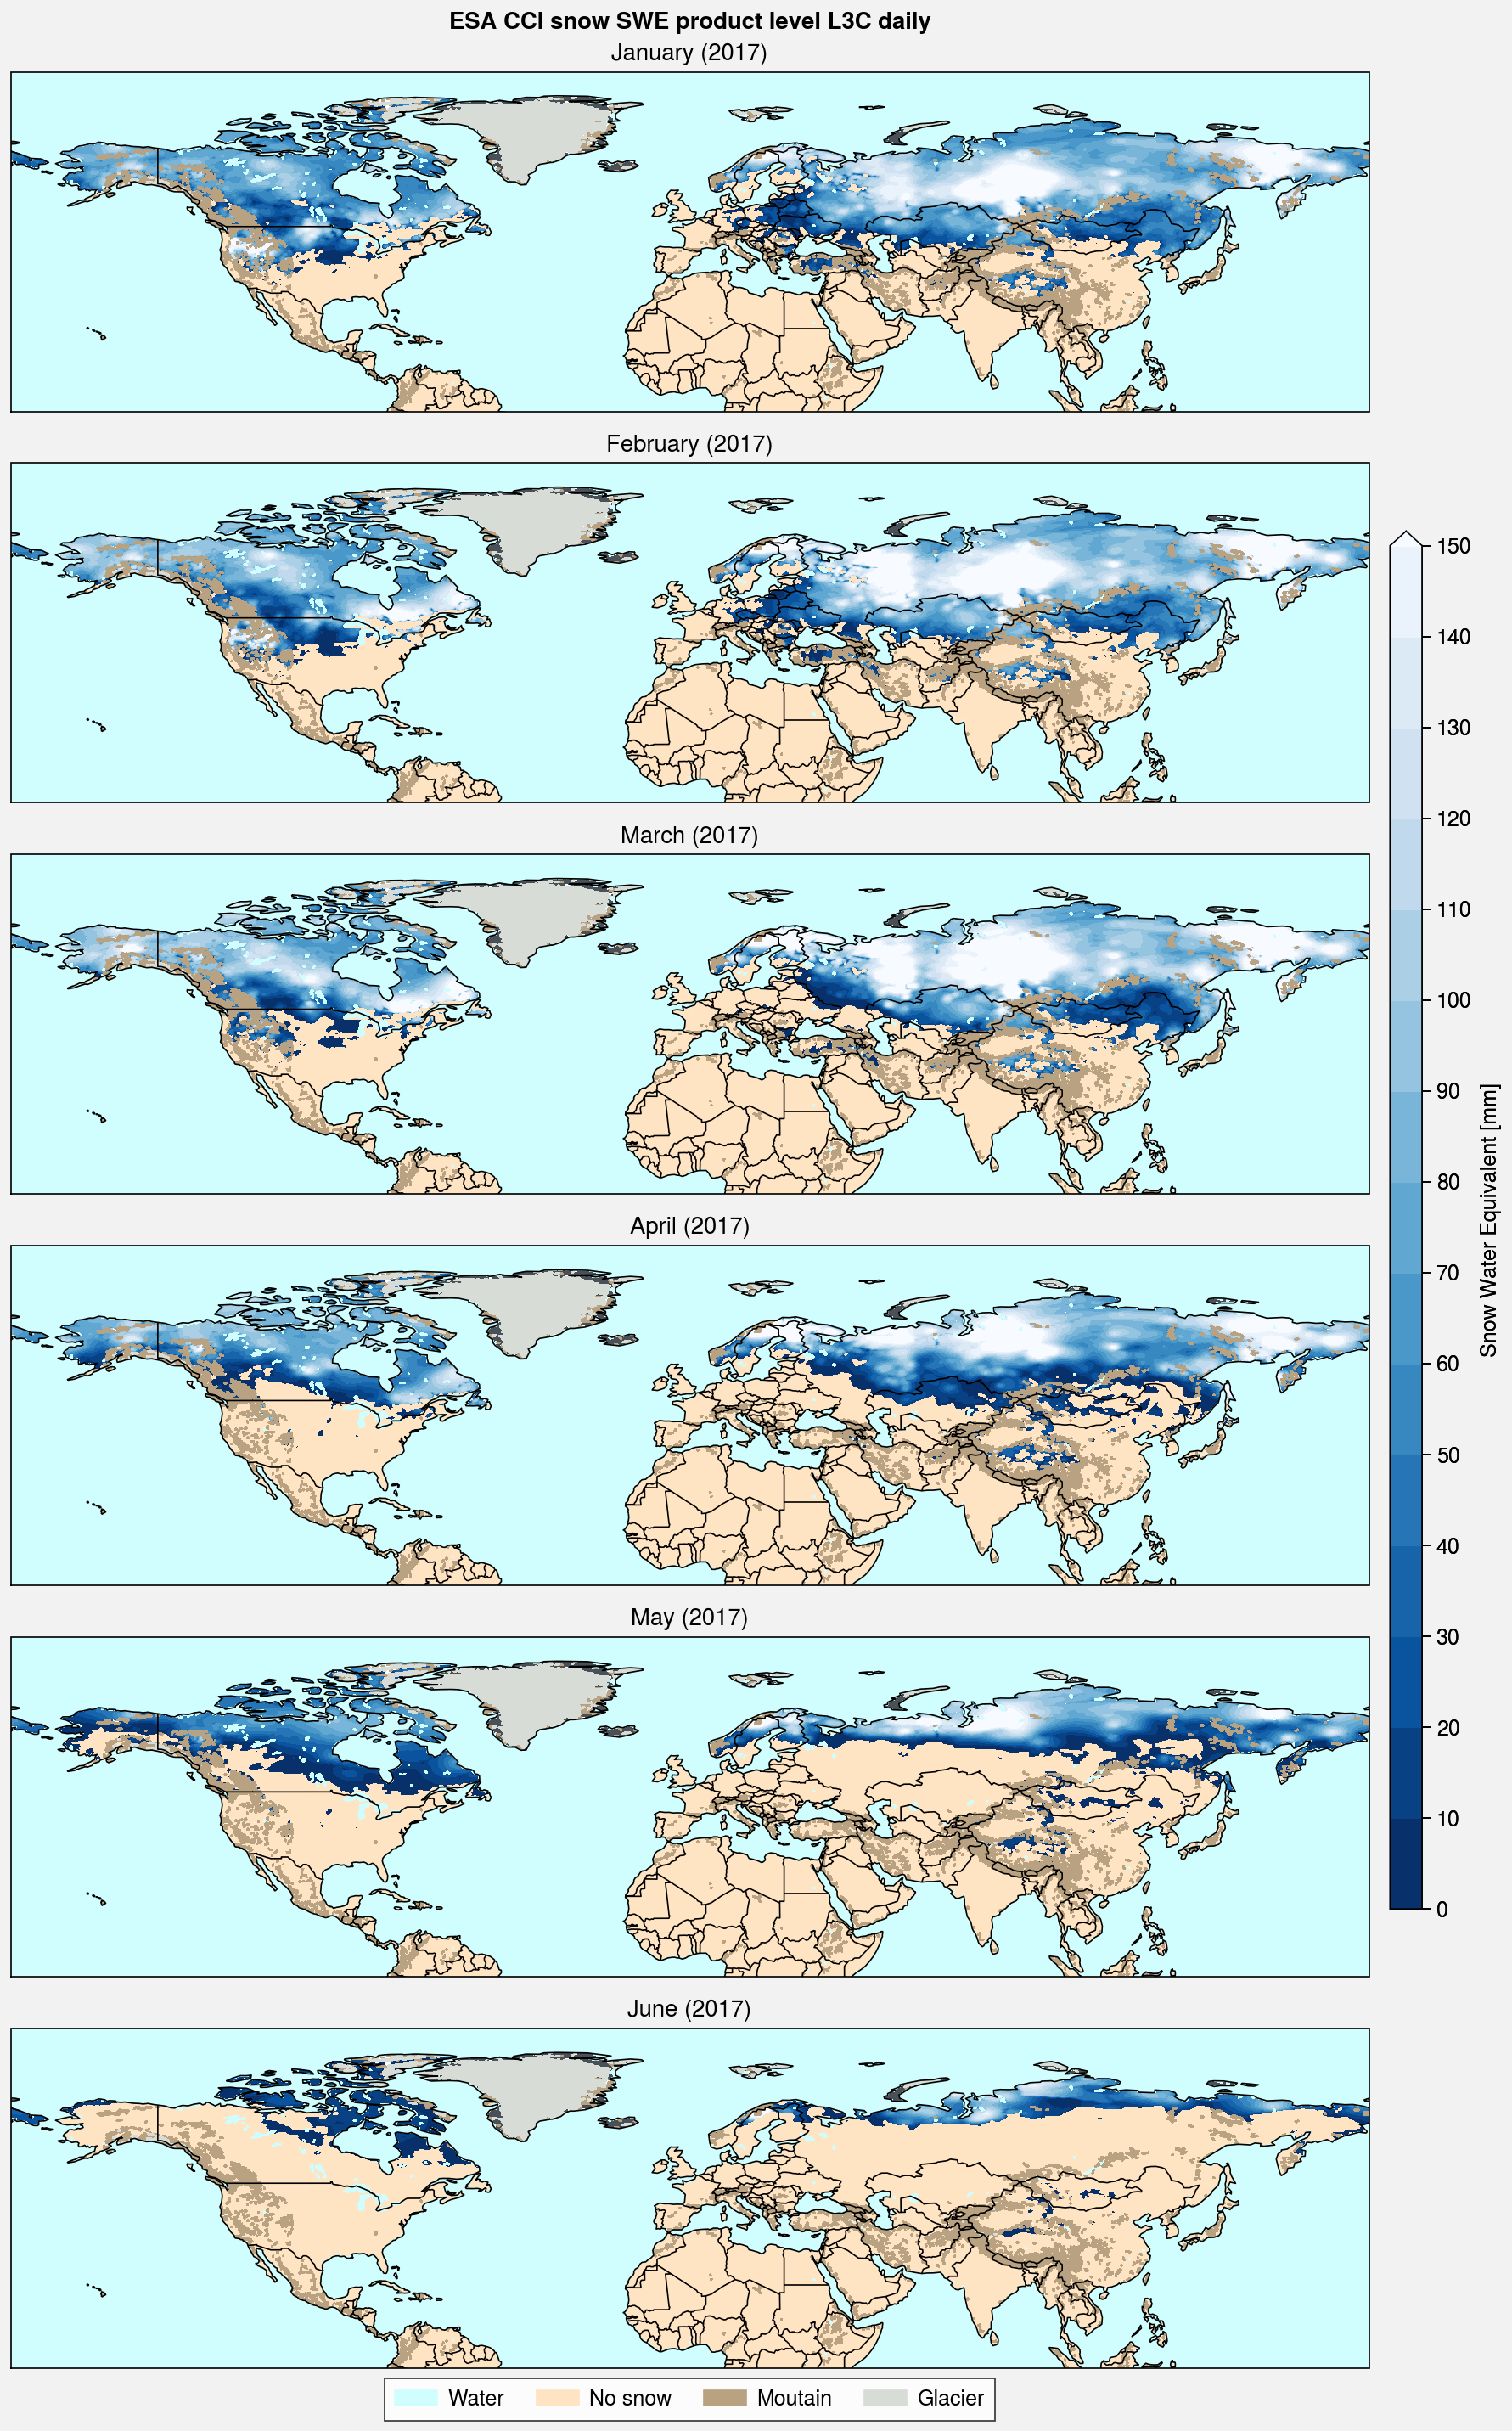

In [87]:
import calendar

fig, axs = plot.subplots(proj='cyl', axwidth=8, nrows=6)

cmap='Blues_r'
levels=plot.arange(0,150,10)
extend='max'

cmap_std='Fire'
levels_std=plot.arange(0,70,5)
extend_std='max'

label_no_data = 'No data'; color_no_data = 'gray7'
label_no_snow = 'No snow'; color_no_snow = 'bisque'
label_water = 'Water'; color_water = 'pale blue'
label_moutain = 'Moutain'; color_moutain = 'taupe'
label_glacier = 'Glacier'; color_glacier = 'light gray'

# SWE
for i in range(6):
    m = axs[i].contourf(monthly_swe.sel(month=i+1), cmap=cmap, levels=levels, extend=extend)
    axs[i].format(title=calendar.month_name[i+1] + ' (2017)')
    
    # no_snow
    axs[i].contourf(monthly_swe.sel(month=i+1).where(monthly_swe.sel(month=i+1) == 0), color=color_no_snow)
no_snow_patch = mpatches.Patch(color=color_no_snow, label=label_no_snow)
    
fig.colorbar(m, label=swe.long_name + ' [' + swe.units + ']', length=0.6)

for ax in axs:
    # no_data (constant mask? might be wrong here)
    ax.contourf(no_data_test, color=color_no_data)
    no_data_patch = mpatches.Patch(color=color_no_data, label=label_no_data)
    
    # Water
    ax.contourf(water_test, color=color_water)
    water_patch = mpatches.Patch(color=color_water, label=label_water)

    # Moutain
    ax.contourf(mountain_test, color=color_moutain)
    moutain_patch = mpatches.Patch(color=color_moutain, label=label_moutain)

    # Glacier
    ax.contourf(glacier_test, color=color_glacier)
    glacier_patch = mpatches.Patch(color=color_glacier, label=label_glacier)

axs[-1].legend(
    [water_patch, no_snow_patch, moutain_patch, glacier_patch], 
    loc='b', ncols=5)

axs.format(
    labels=False, grid=False, latlim=(0,90), coast=True, borders=True,
    ocean=True, oceancolor=color_water,
    suptitle=ds.title
)